<div dir="rtl" style="text-align: right;">
    
### **تمرین سری چهارم هوش مصنوعی**
### **بخش سوم: Transfer Learning**
### **محمدمهدی تویسرکانی**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div dir="rtl" style="text-align: right;">
    
### **1- آماده‌سازی داده‌ها**

Found 1224 images belonging to 6 classes.
Found 216 images belonging to 6 classes.


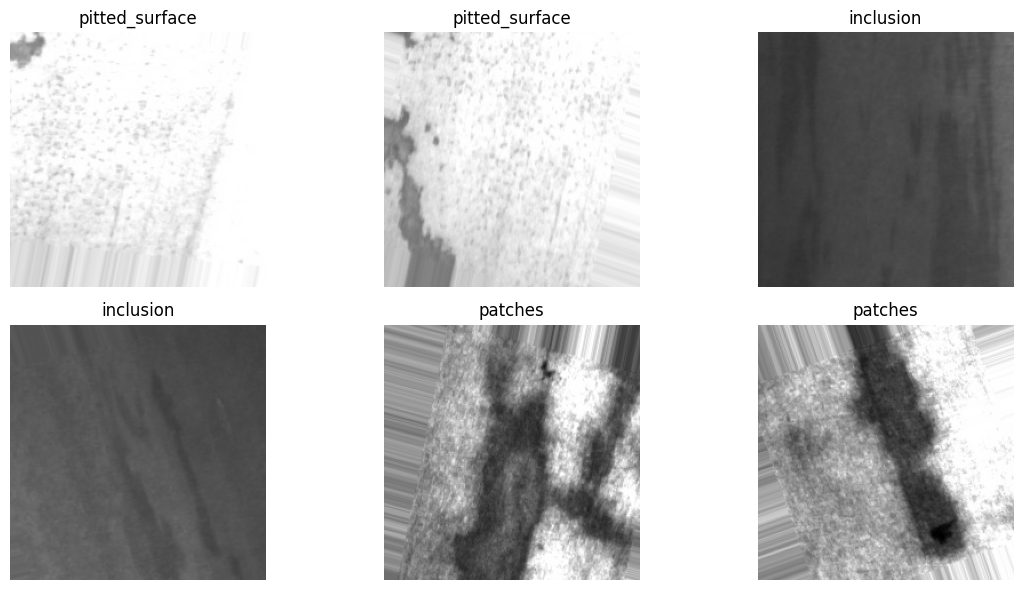

In [1]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = datagen.flow_from_directory(
    'G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\train\images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'G:\Artificial_Intelligence\Tamrin\Tamrin4\HW4\NEU-DET\validation\images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

class_names = list(train_generator.class_indices.keys())
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_batch[i])
    plt.title(class_names[np.argmax(y_batch[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right;">
    
### **2- آماده‌سازی مدل**

In [2]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=predictions)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

<div dir="rtl" style="text-align: right;">
    
### **3- مرحله‌ی آموزش**

In [4]:
history_resnet = model_resnet.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
39/39 [==============================] - 314s 8s/step - loss: 1.6686 - accuracy: 0.2876 - val_loss: 1.6508 - val_accuracy: 0.2315
Epoch 2/25
39/39 [==============================] - 318s 8s/step - loss: 1.6588 - accuracy: 0.3007 - val_loss: 1.6125 - val_accuracy: 0.2639
Epoch 3/25
39/39 [==============================] - 321s 8s/step - loss: 1.6025 - accuracy: 0.3309 - val_loss: 1.5847 - val_accuracy: 0.3194
Epoch 4/25
39/39 [==============================] - 318s 8s/step - loss: 1.5842 - accuracy: 0.3652 - val_loss: 1.5488 - val_accuracy: 0.3148
Epoch 5/25
39/39 [==============================] - 316s 8s/step - loss: 1.5476 - accuracy: 0.3521 - val_loss: 1.4958 - val_accuracy: 0.4306
Epoch 6/25
39/39 [==============================] - 327s 8s/step - loss: 1.5110 - accuracy: 0.4003 - val_loss: 1.5171 - val_accuracy: 0.3380
Epoch 7/25
39/39 [==============================] - 324s 8s/step - loss: 1.4981 - accuracy: 0.3938 - val_loss: 1.4486 - val_accuracy: 0.4028
Epoch 8/25
39

In [6]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

model_resnet.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

history_finetune = model_resnet.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)

Epoch 1/25
39/39 [==============================] - 437s 11s/step - loss: 9.4732 - accuracy: 0.4812 - val_loss: 7.3057 - val_accuracy: 0.2824
Epoch 2/25
39/39 [==============================] - 422s 11s/step - loss: 0.9431 - accuracy: 0.6814 - val_loss: 26.8096 - val_accuracy: 0.1667
Epoch 3/25
39/39 [==============================] - 422s 11s/step - loss: 0.7139 - accuracy: 0.7647 - val_loss: 34.3263 - val_accuracy: 0.1667
Epoch 4/25
39/39 [==============================] - 429s 11s/step - loss: 0.6601 - accuracy: 0.7672 - val_loss: 33.1444 - val_accuracy: 0.1667
Epoch 5/25
39/39 [==============================] - 423s 11s/step - loss: 0.6329 - accuracy: 0.7966 - val_loss: 27.1167 - val_accuracy: 0.1667
Epoch 6/25
39/39 [==============================] - 440s 11s/step - loss: 0.5564 - accuracy: 0.8309 - val_loss: 18.7796 - val_accuracy: 0.1667
Epoch 7/25
39/39 [==============================] - 427s 11s/step - loss: 0.5742 - accuracy: 0.8162 - val_loss: 12.1562 - val_accuracy: 0.2222


<div dir="rtl" style="text-align: right;">
    
### **4- ارزیابی نهایی**

7/7 [==============================] - 38s 5s/step - loss: 0.6776 - accuracy: 0.6667
Final Test Accuracy: 66.67%
Final Test Loss: 0.6776
7/7 [==============================] - 42s 6s/step


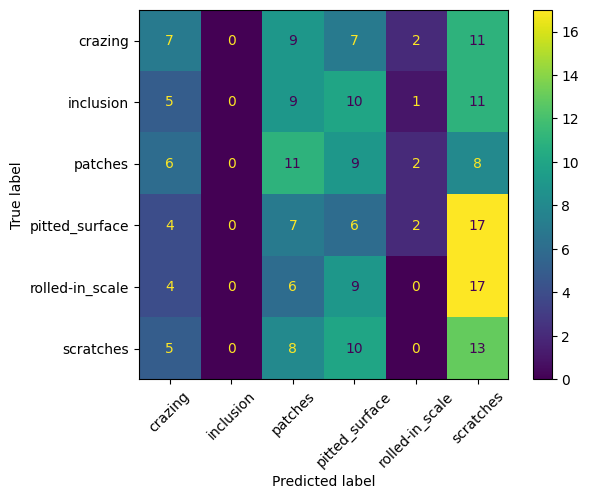

In [7]:
loss_resnet, acc_resnet = model_resnet.evaluate(val_generator)
print(f"Final Test Accuracy: {acc_resnet * 100:.2f}%")
print(f"Final Test Loss: {loss_resnet:.4f}")

y_true = val_generator.classes
y_pred = np.argmax(model_resnet.predict(val_generator), axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.show()

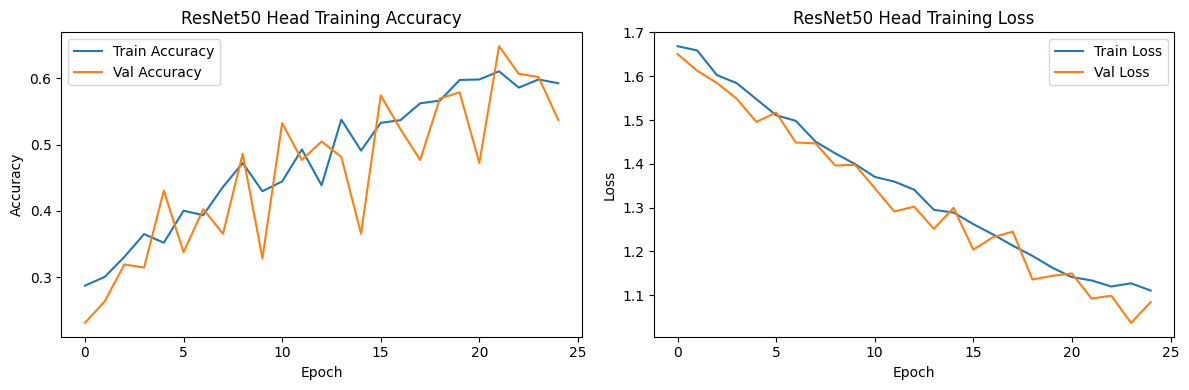

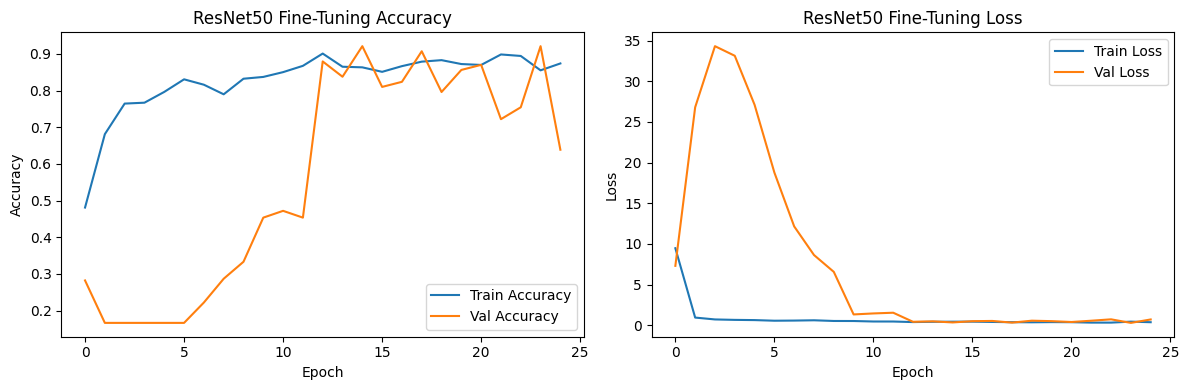

In [8]:
def plot_history(history, title=""):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_resnet, title="ResNet50 Head Training")
plot_history(history_finetune, title="ResNet50 Fine-Tuning")